Crosland Agathe
ICE 2019

The aim of this program is to find words from a list (here the 3000 most common words in english language) in a proteic sequence (here the human proteome).

# Useful package(s)

In [9]:
import matplotlib.pyplot as plt
    #To do graph
import pandas as pd
    #Use to create dataframe

# Functions to import data files

In [10]:
#Function to import a fasta file ((c) ebecker)

# readFastaFile1
# PARAMETERS : the filename (the file is in fasta format)
# RETURNS : a unique string with all the protein sequences concatenated

def readFastaFile1(filename) :
    
    # opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file. 
    # fisrt, I want to seperate the proteins, the symbol that starts a new protein is '>'
    seqs = txt.split('>')[1:]
    s = ""
    
    for seq in seqs :
        lines = seq.split('\n')[1:]     
        for line in lines :
            s = s + line
    return(s)



def read_a_list_of_words_into_majuscule (filename) :
    txt = open (filename, 'r') 
    w =[]
    for line in txt:
        #For all the lines find in the file the following lines create a string and concatene it to the list
        line=line.upper()
            #To have only majuscule to compare with proteom
        line = line.split()
            #The line is a string...
        w.extend(line)
            #... and this string become an element of the list
    txt.close()
    
    return(w)
        #We return the list of string

# Function to find what are the words are in an other 

In [11]:
def interesting_list_in_list (list_to_sort,list_of_ref) :
    # This function take a first list (list_to_sort) and by comparing with an other list (list_of_ref), find the elements
    #of the first present in the second ...
    lighter_list=[]
        # ... and put the element found in a new list.
    for string in list_to_sort :
        #To do it, I run on all the element of the first list ...
        if string in list_of_ref :
            # ... and use "in" to determine if the element is in the reference list ...
            lighter_list.append(string)
                #... if it's the case, I put the element in the new list
                
    return(lighter_list)
        #The function return the list of the element of list_to_sort found in list_of_ref

#Obviously, this function alone can be use to find what are the words found in the proteome,
#but it's not funny so we are also going to finf how many time and where they are in the proteome

# Counting occurence of a word in proteome

In [12]:
def how_many_time(to_count,list_of_ref):
    how_many=[]
        #Create a space to stock the count
    for word in to_count :
        how_many_word=list_of_ref.count(word)
            #Again a very useful function in python: count
        how_many.append(how_many_word)
            #add a new element, corresponding to the number of occurence of word
            
    return(how_many)

# Find positions of words in proteome

In [13]:
def where_are_words (list_of_word,list_of_ref) :
    
    l_list_of_word=len(list_of_word)
    
    where=[[] for i in range(l_list_of_word)]
        #Creation of a list of empty list to store the positions for each word
    dict_where=dict(zip(list_of_word,where))
        #Use of a dictionnary to recover the position of every word because it allow to identify
        #easily thank to the key where to store the position value
        
    l_list_of_ref = len(list_of_ref)
        #length of the ref list
        
    for amino_acid in range(0,l_list_of_ref) :
        #Browse the element of the ref list
        
        for word in list_of_word :
            #Browse the list of words
            where_word=list(dict_where[word])
            l_word=len(word)
                #Lenght of the word to cut a subset of proteome with the same size ...
            if list_of_ref[amino_acid] == word[0] :
                if amino_acid + l_word <= l_list_of_ref : 
                    #If there is enough letters in the remain of proteome...
                    sub_list_of_ref=list_of_ref[amino_acid : amino_acid + l_word]
                        # .. use the lenght of the word to cut a subset of proteome with the same size.
                    if word == sub_list_of_ref :
                    #If the sub part of proteome is the considered word...
                        dict_where[word].append(amino_acid)
                            #... where_word store the position of the first letter in the proteome
            #For each word in words_in_proteome, the list of positions is store in the corresponding
            #value for the considered word
            
            #NB: this for loop can be use to do all we want (replace interesting_list_in_list and the previous loop that
            # count the number of each word occurence) with tiny modifications
    
    where=list(dict_where.values())
    
    return(where)

# Functions to do an histogram giving the number of words with a number of letter found in the proteom

In [14]:
def count_lenght_words_and_occuring (list_word,list_number_occuring) :
    
    l_words=[]
        #Storage space for the length of words
    for word_i in range(0,len(list_word)) :
        l_words.append(len(list_word[word_i]))
            #Fill the storage with the length of each word
    
    #Recover the min and max...
    min_l=min(l_words)
    max_l=max(l_words)
    
    l_words=[i for i in range(min_l,max_l+1)]
       #... to create a  list of possible length 
    
    count_l_word=[0 for i in range(min_l,max_l+1)]
        #Storage space for the number of occurence of words of each length
    for word_i in range(0,len(list_word)) :
        # For each word ...
        for l in range(0,len(l_words)) :
            # ... and for each possible length ...
            if len(list_word[word_i]) == l_words[l] :
                #... if the length of the word is egal to the consider length ...
                count_l_word[l]=count_l_word[l] + list_number_occuring[word_i]
                    #... we add the number of occurence to the ones of other words with the same length.
    
    return(l_words,count_l_word)

def hist_count_letter (nb_letter,nb_word_n_letter) :
    plt.bar(nb_letter,nb_word_n_letter)
        #Create histogram
    plt.title("Number of occuring found according to words size (one letter included)")
        #Add a title
    plt.show()
        #Show the graph
    
    # The one letter appear too much time, we can remove them:
    if nb_letter[0]==1 :
        nb_letter.pop(0)
        nb_word_n_letter.pop(0)
        plt.bar(nb_letter,nb_word_n_letter)
        plt.title("Number of occuring found according to words size (only more than one letter)")
        plt.show()

# All functions together

In [15]:
def find_words_count_where(words_to_find,where_to_search):
    
    where_or_not = str(input("Do you need the positions of words in the proteome (it will take more time)? Y/N: "))
    
    while not(where_or_not== "Y" or where_or_not=="N") :
        print("The only accepted answer are Y or N")
        where_or_not = str(input("Do you need the positions of words in the proteome? Y/N: "))    
    
    #Import the list of words to find and the human proteome
    
    words=read_a_list_of_words_into_majuscule(words_to_find)
        #Import the list of the 3000 most common words in english as a list of list of letters
    proteome = readFastaFile1(where_to_search)
        #Import the human proteom as a list of letters
    l_proteome=len(proteome)
        #Lenght of proteome
    
    #Reduce the words to the one that are actually in proteome
    words_in_proteome=interesting_list_in_list(words,proteome)
    l_words_in_proteome=len(words_in_proteome)
        #It highly reduce the number of words to find in proteome
    print(l_words_in_proteome, " words found.")
    
    #How many time these words appear in the proteome
    how_many=how_many_time(words_in_proteome,proteome)
    
    #Where they are
    if where_or_not =="Y" :
        where=where_are_words(words_in_proteome,proteome)
    else :
        where=[]
    
    #Count the length of words found and how many each length is found to do a histogram
    for_hist = count_lenght_words_and_occuring (words_in_proteome,how_many)
    #Do the histogram
    hist_count_letter (for_hist[0],for_hist[1])

# Run everything

Do you need the positions of words in the proteome (it will take more time)? Y/N: N
238  words found.


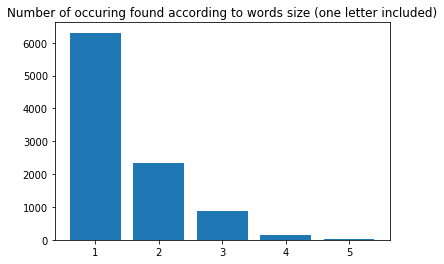

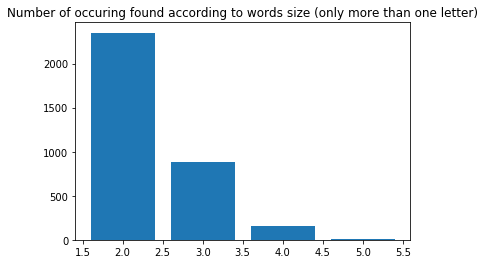

In [16]:
find_words_count_where("english-words.txt","human-proteome-small.fasta")